In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Basic Options

In [2]:
def stock(spot_price,strike_price):
    
    # POV of the buyer of stock
    # Strike = Acquisition; Spot = Sale
    
    profit = spot_price - strike_price
    
    return profit

In [3]:
def call(spot_price, strike_price, premium):
    
    # The CALL pption gives its holder the RIGHT TO BUY an asset at the strike price
    # EUROPEAN call
    # POV of the BUYER of the option
    
    profit = max(0, spot_price - strike_price) - premium
    
    return profit

In [4]:
def put(spot_price, strike_price, premium):
    
    # The PUT Option gives its holder the RIGHT TO SELL an asset at the strike price
    # EUROPEAN put
    # POV of the BUYER of the option
    
    profit = max(0, strike_price - spot_price) - premium
    
    return profit

In [5]:
# Strike Price = 0 -> Graph is interpretated as a delta
# Range(-100,) -> The stock may only devalue 100%

X = range(-100,100)
y_long_call = [call(spot_price,0,20) for spot_price in X]
y_long_put = [put(spot_price,0,20) for spot_price in X]
y_short_call = [-call(spot_price,0,20) for spot_price in X]
y_short_put = [-put(spot_price,0,20) for spot_price in X]
xy = [[X,y_long_call,'Long Call'],
      [X,y_short_call,'Short Call'],
      [X,y_long_put,'Long Put'],
      [X,y_short_put,'Short Put']]

In [6]:
def plot_xy(xy, title='Returns of Options'):
    for i in xy:
        # X, y, label
        plt.plot(i[0],i[1],label=i[2])
        
    # Labels & Style
    plt.title(title,fontweight='bold')
    plt.xlabel('Spot Price')
    plt.ylabel('Profit')
    plt.legend(loc='upper left')
    plt.grid(ls=':')

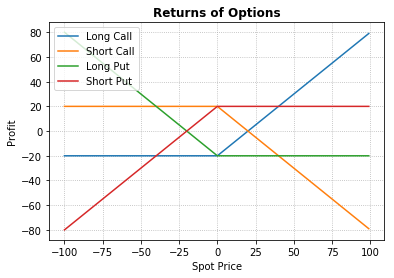

In [7]:
plot_xy(xy)

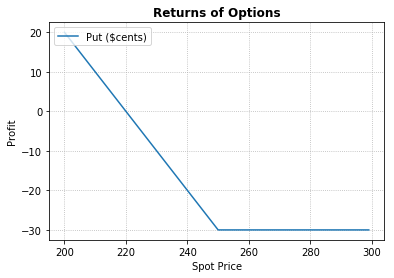

In [55]:
# Example: Company trading at 45, premium at 1

x1 = range(200,300)
y1 = [put(spot_price,250,30) for spot_price in x1]
z1 = [[x1,y1,'Put ($cents)']]

plot_xy(z1)

### Put-Call Parity
- C + PV(x) = P + S
- C = Price of the European call option
- PV(X) = The present value of the strike price (x), discounted from the value on the expiration date at the risk-free rate
- P = price of the European put
- S = spot price or the current market value of the underlying asset

https://www.investopedia.com/terms/p/putcallparity.asp

def put_call_parity(C=None,PV=None,P=None,S=None):
    
    # C + PV(x) = P + S
    
    if all([C!=None, PV!=None, P!= None, S!= None]):
        assert C + PV == P + S, 'The non-arbitrage condition does not hold!'
    
    return([C,PV,P,S])

# 2. Strategies

### 2.1. Covered Call

In [8]:
def covered_call(spot_price, strike_price_stock, strike_price_call, premium_call):
    
    profit = stock(spot_price,strike_price_stock) - call(spot_price,strike_price_call,premium_call)
    
    return profit

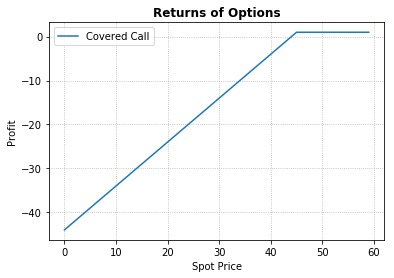

In [9]:
# Example: Company trading at 45, premium at 1

x1 = range(0,60)
y1 = [covered_call(spot_price,45,45,1) for spot_price in x1]
z1 = [[x1,y1,'Covered Call']]

plot_xy(z1)

### 2.2. Protective Put

In [10]:
def protective_put(spot_price, strike_price_stock, strike_price_put, premium_put):
    
    profit = stock(spot_price,strike_price_stock) + put(spot_price,strike_price_put,premium_put)
    
    return profit

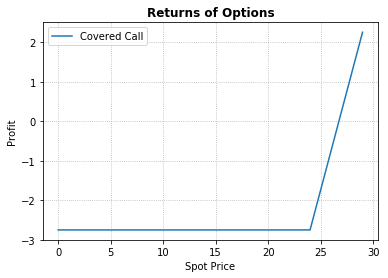

In [11]:
# Example: Company trading at 26 with put 24-0.75

x1 = range(0,30)
y1 = [protective_put(spot_price,26,24,.75) for spot_price in x1]
z1 = [[x1,y1,'Covered Call']]

plot_xy(z1)

### 2.3 Collars

In [12]:
def collar(spot_price,strike_price_stock,strike_price_call,premium_call,strike_price_put,premium_put):
    
    profit = stock(spot_price,strike_price_stock) - call(spot_price,strike_price_call,premium_call) + put(spot_price,strike_price_put,premium_put)
    
    return profit

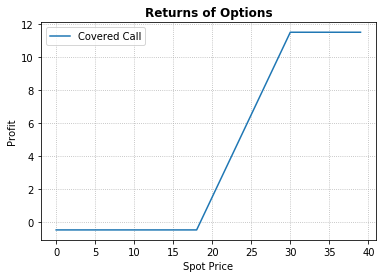

In [13]:
# Example: Company trading at 20 with call 30-2.50 and put 18-1.00

x1 = range(0,40)
y1 = [collar(spot_price,20,30,2.5,18,1) for spot_price in x1]
z1 = [[x1,y1,'Covered Call']]

plot_xy(z1)

### 2.4 Vertical Spread
There are four cases of vertical spread. In all of them, the maximum profit or loss is limited.
- Bullish Call: You make money as prices go up, and lose if they go down. You start with a debit.
- Bearish Call: You lose money as prices go up, and make if they go down. You start with a credit.
- Bullish Put: You make money as prices go up, and lose if they go down. You start with a credit.
- Bearish Put: You lose money as prices go up, and make if they go down. You start with a debit.

In [14]:
def vertical_spread(spot_price, f, strike_price_high, premium_high, strike_price_low, premium_low):
    
    if f == put:
        strike_price_high, premium_high, strike_price_low, premium_low = strike_price_low, premium_low, strike_price_high, premium_high
        
    profit = f(spot_price,strike_price_high,premium_high) - f(spot_price,strike_price_low,premium_low)
    
    return profit

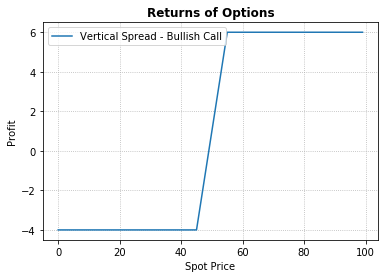

In [15]:
# Bullish Call
# Example: Company trading at 50 with calls at 45-5 and 55-1

x1 = range(0,100)
y1 = [vertical_spread(spot_price,call,45,5,55,1) for spot_price in x1]
z1 = [[x1,y1,'Vertical Spread - Bullish Call']]

plot_xy(z1)

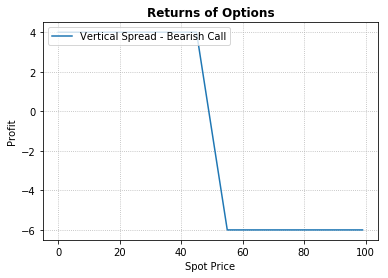

In [16]:
# Bearish Call
# Example: Company trading at 50 with calls at 54-1 and 45-5

x1 = range(0,100)
y1 = [-vertical_spread(spot_price,call,45,5,55,1) for spot_price in x1]
z1 = [[x1,y1,'Vertical Spread - Bearish Call']]

plot_xy(z1)

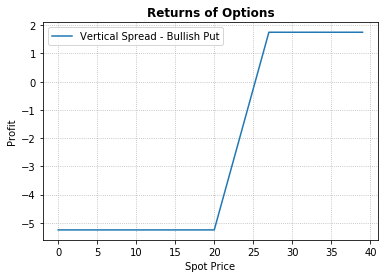

In [17]:
# Bullish Put
# Example: Company trading at 23 with put at 20-1.25 and 27-3

x1 = range(0,40)
y1 = [vertical_spread(spot_price,put,27,3,20,1.25) for spot_price in x1]
z1 = [[x1,y1,'Vertical Spread - Bullish Put']]

plot_xy(z1)

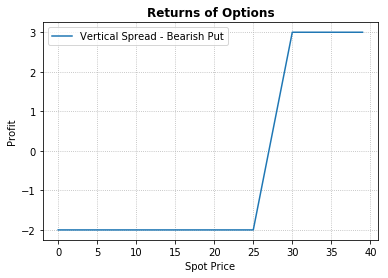

In [18]:
# Bearish Put
# Example: Company trading at 28 with put at 25-1 and 30-4

x1 = range(0,40)
y1 = [-vertical_spread(spot_price,put,25,1,30,4) for spot_price in x1]
z1 = [[x1,y1,'Vertical Spread - Bearish Put']]

plot_xy(z1)

### 2.5 Calendar Spread

### 2.6 Diagonal Spread

### 2.7 Butterfly Spread

In [19]:
def butterfly_spread(spot_price, f, strike_price_high, premium_high, strike_price_medium, premium_medium, strike_price_low,premium_low):

    profit = f(spot_price,strike_price_high,premium_high) -2*f(spot_price,strike_price_medium,premium_medium) + f(spot_price,strike_price_low,premium_low)
    
    return profit

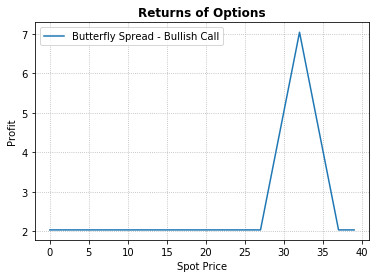

In [20]:
# Example: Company trading at 32 with calls at 27-5.7, 32-39.4 and 37-.14

x1 = range(0,40)
y1 = [butterfly_spread(spot_price,call,37,.14,32,3.94,27,5.70) for spot_price in x1]
z1 = [[x1,y1,'Butterfly Spread - Bullish Call']]

plot_xy(z1)

### 2.8 Condor Spread

In [21]:
def condor_spread(spot_price,strike_price_high_1,premium_high_1,strike_price_low_1,premium_low_1, strike_price_high_2,premium_high_2,strike_price_low_2,premium_low_2):

    profit = -vertical_spread(spot_price,call,strike_price_high_1,premium_high_1,strike_price_low_1,premium_low_1)
    profit += vertical_spread(spot_price,call,strike_price_high_2,premium_high_2,strike_price_low_2,premium_low_2)
    
    return profit

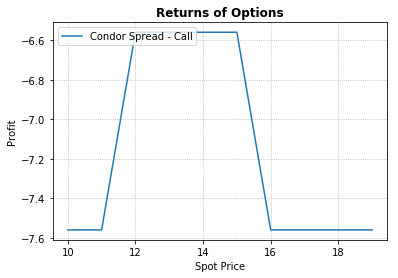

In [22]:
# Example: Company trading at 54 with calls at with calls at 44-11.05, 49-6.04, 59-.53, and 64-0.08

x1 = range(10,20)
y1 = [condor_spread(spot_price,15,1.29,11,5.50,16,5,12,1.65) for spot_price in x1]
z1 = [[x1,y1,'Condor Spread - Call']]

plot_xy(z1)

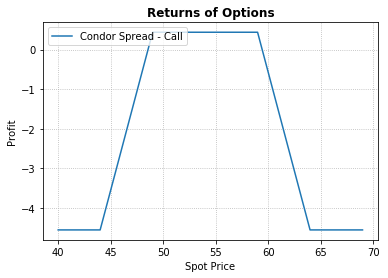

In [23]:
x1 = range(40,70)
y1 = [condor_spread(spot_price,59,.53,64,.08,44,11.05,49,6.04) for spot_price in x1]
z1 = [[x1,y1,'Condor Spread - Call']]

plot_xy(z1)

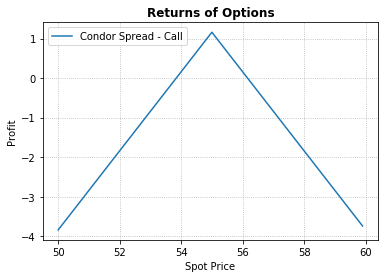

In [24]:
x1 = np.arange(50,60,0.1)
y1 = [butterfly_spread(spot_price, call, 50, 4.45, 55, .31, 60, .01) for spot_price in x1]
z1 = [[x1,y1,'Condor Spread - Call']]

plot_xy(z1)

### 2.9 Straddle

In [25]:
def straddle(spot_price,strike_price,premium_call,premium_put):
    
    # Buys call and put
    profit = call(spot_price,strike_price,premium_call) + put(spot_price,strike_price,premium_put)
    
    return profit

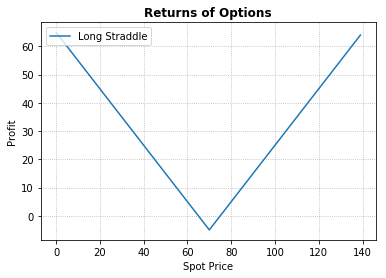

In [26]:
# Example: Company trading at 70 with calls at with call/put at 70-2.50

x1 = range(0,140)
y1 = [straddle(spot_price,70,2.50,2.50) for spot_price in x1]
z1 = [[x1,y1,'Long Straddle']]

plot_xy(z1)

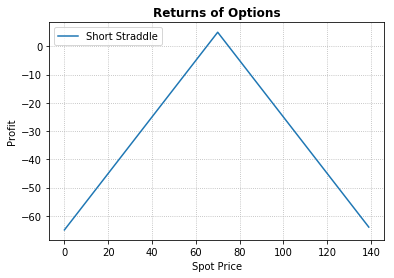

In [43]:
# Example: Company trading at 70 with calls at with call/put at 70-2.50

x1 = range(0,140)
y1 = [-straddle(spot_price,70,2.50,2.50) for spot_price in x1]
z1 = [[x1,y1,'Short Straddle']]

plot_xy(z1)

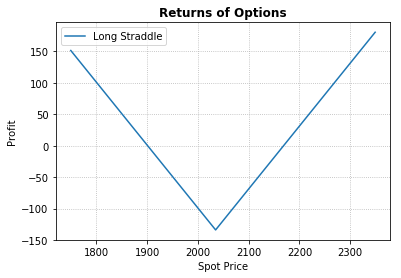

In [49]:
# CALL = 68.6; PUT = 65.2
# spot = 2050

x1 = range(1750,2350)
y1 = [straddle(spot_price,2035,68.6,65.2) for spot_price in x1]
z1 = [[x1,y1,'Long Straddle']]

plot_xy(z1)

### 2.10 Strangle

In [28]:
def strangle(spot_price,strike_price_call,premium_call,strike_price_put,premium_put):
    
    # Buys call and put
    profit = call(spot_price,strike_price_call,premium_call) + put(spot_price,strike_price_put,premium_put)
    
    return profit

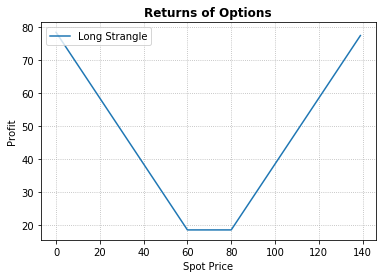

In [29]:
# Example: Company trading at 70 with calls at with call at 80-.75 and put at 60.75

x1 = range(0,140)
y1 = [strangle(spot_price,60,.75,80,.75) for spot_price in x1]
z1 = [[x1,y1,'Long Strangle']]

plot_xy(z1)

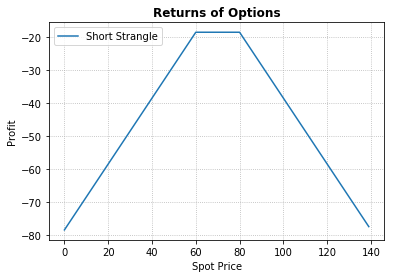

In [30]:
# Example: Company trading at 70 with calls at with call at 80-.75 and put at 60.75

x1 = range(0,140)
y1 = [-strangle(spot_price,60,.75,80,.75) for spot_price in x1]
z1 = [[x1,y1,'Short Strangle']]

plot_xy(z1)

### 2.11 Iron Butterfly

In [31]:
def iron_butterfly(spot_price,
                   strike_price_call_high,premium_call_high,
                   strike_price_call_low,premium_call_low,
                   strike_price_put_high,premium_put_high,
                   strike_price_put_low,premium_put_low):
    
    # Bearish Call Vertical Spread + Bullish Put Vertical Spread
    profit = - vertical_spread(spot_price,call,strike_price_call_high,premium_call_high,strike_price_call_low,premium_call_low)
    profit -= vertical_spread(spot_price,put,strike_price_put_high,premium_put_high,strike_price_put_low,premium_put_low)
    
    return profit

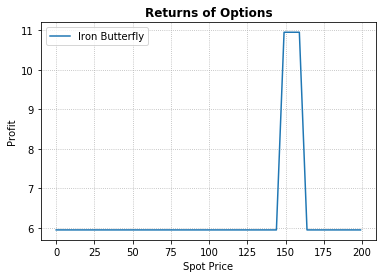

In [32]:
# Example: Company trading at 154 with calls at 159-.37, 164-.05 and puts at 144-.61, 149-1.24

x1 = range(0,200)
y1 = [iron_butterfly(spot_price,149,1.24,144,.61,164,.05,159,.37) for spot_price in x1]
z1 = [[x1,y1,'Iron Butterfly']]

plot_xy(z1)

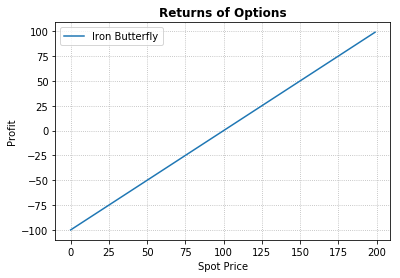

In [33]:
# Example: Company trading at 154 with calls at 159-.37, 164-.05 and puts at 144-.61, 149-1.24

x1 = range(0,200)
y1 = [call(spot_price,100,2) - put(spot_price,100,2) for spot_price in x1]
z1 = [[x1,y1,'Iron Butterfly']]

plot_xy(z1)

# 3. Implied Volatility

In [34]:
import numpy as np
import scipy.stats as si

In [37]:
def vega(S, K, T, r, sigma):
    
    # Python Implementation of Vega for Non-Dividend Paying Assets
    # https://aaronschlegel.me/implied-volatility-functions-python.html

    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    vega = S * si.norm.cdf(d1, 0.0, 1.0) * np.sqrt(T)
    
    return vega

vega(470,490,0.08,0.033,0.5)

55.6566033696137

In [38]:
def vega_div(S, K, T, r, sigma, q):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    #q: continuous dividend rate
    
    # Python Implementation of Vega for Dividend Paying Assets
    # https://aaronschlegel.me/implied-volatility-functions-python.html
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    vega = 1 / np.sqrt(2 * np.pi) * S * np.exp(-q * T) * np.exp(-(d1 ** 2) * 0.5) * np.sqrt(T)
    
    return vega